## EDA US Visa

In [1]:
# This eda has a lot of visulaisation and feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\angaj\Downloads\us_perm_visas.csv")

In [3]:
df.head(3)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN


In [4]:
df.shape

(374362, 154)

In [5]:
# Total null values
df.isna().sum().sum()

32986703

In [7]:
# columns name 
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [8]:
# len of columns name
len(df.columns)

154

In [9]:
print(df.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

In [10]:
# Print column and which value no
df["add_these_pw_job_title_9089"][7]

nan

In [10]:
df['case_no']

0         A-07323-97014
1         A-07332-99439
2         A-07333-99643
3         A-07339-01930
4         A-07345-03565
              ...      
374357              NaN
374358              NaN
374359              NaN
374360              NaN
374361              NaN
Name: case_no, Length: 374362, dtype: object

In [11]:
df['case_number']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
374357    A-16363-85407
374358    A-16271-56745
374359    A-16354-82345
374360    A-16357-84250
374361    A-16279-59292
Name: case_number, Length: 374362, dtype: object

In [12]:
# seeing the values of case_no and case_number it seems both have same meaning, i.e-values application
# few values at the top in case_no is null
# few values at the tail case_number is null

In [26]:
df['case_no'].nunique()

134990

In [29]:
df['case_number'].nunique()

238418

In [30]:
df['case_number'].isna().sum()

135269

In [9]:
238418 + 135269

373687

In [ ]:
# isnull values in case number is almost close to values in case no

In [32]:
df['case_number'] # Top 173687 rowa are null values

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
374357    A-16363-85407
374358    A-16271-56745
374359    A-16354-82345
374360    A-16357-84250
374361    A-16279-59292
Name: case_number, Length: 374362, dtype: object

In [10]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [34]:
casenoindex = df.columns.get_loc('case_no')
casenumberindex = df.columns.get_loc('case_number')

casenumberlist = []
for value in df.iloc[0:135269, casenoindex]:
    casenumberlist.append(value)

for value in df.iloc[135269:37433662, casenumberindex]:
    casenumberlist.append(value)

In [39]:

df['casenumber'] = casenumberlist

In [ ]:
df.drop(['case_no', 'case_number'], axis = 1, inplace = True)

In [41]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089', 'casenumberlist', 'casenumber'],
      dtype='object', length=154)

In [12]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [11]:
# you can also use dircatly values_counts
for value in df.case_status.unique():
    print(len(df[df['case_status'] == value]), "occurence pf stats '{}'".format(value))

181933 occurence pf stats 'Certified'
25649 occurence pf stats 'Denied'
148586 occurence pf stats 'Certified-Expired'
18194 occurence pf stats 'Withdrawn'


In [15]:
df = df[df.case_status != 'Withdrawn']

In [17]:
df.case_status.value_counts()

case_status
Certified            181933
Certified-Expired    148586
Denied                25649
Name: count, dtype: int64

In [18]:
df.loc[df.case_status == 'Certified-Expired', 'case_status'] == "Certified"

6         False
15        False
21        False
26        False
37        False
          ...  
285895    False
285896    False
285897    False
285899    False
285900    False
Name: case_status, Length: 148586, dtype: bool

In [19]:
df.case_status.value_counts()

case_status
Certified            181933
Certified-Expired    148586
Denied                25649
Name: count, dtype: int64

In [25]:
# how many appled VISA
df.case_status.value_counts(normalize = True)*100

case_status
Certified            51.080670
Certified-Expired    41.717953
Denied                7.201377
Name: proportion, dtype: float64

In [ ]:
# insights: 7.20% of the visa application were denied

In [27]:
df.isna().sum()

add_these_pw_job_title_9089      317031
agent_city                       153452
agent_firm_name                  157646
agent_state                      156544
application_type                 229320
                                  ...  
wage_offer_to_9089               285397
wage_offer_unit_of_pay_9089      108769
wage_offered_from_9089           248582
wage_offered_to_9089             326852
wage_offered_unit_of_pay_9089    289470
Length: 154, dtype: int64

In [28]:
# Dropping all empty rows and columns
df.dropna(axis = 1, how = 'all', inplace = True)
df.dropna(axis = 0, how = 'all', inplace = True)

In [13]:
for columns in df.columns:
    print(f"The missing values for {columns} is {df[columns].isnull().sum()}")

The missing values for add_these_pw_job_title_9089 is 332168
The missing values for agent_city is 162908
The missing values for agent_firm_name is 167365
The missing values for agent_state is 166123
The missing values for application_type is 239093
The missing values for case_no is 239093
The missing values for case_number is 135269
The missing values for case_received_date is 135271
The missing values for case_status is 0
The missing values for class_of_admission is 22845
The missing values for country_of_citizenship is 20633
The missing values for country_of_citzenship is 353788
The missing values for decision_date is 0
The missing values for employer_address_1 is 42
The missing values for employer_address_2 is 247931
The missing values for employer_city is 14
The missing values for employer_country is 135343
The missing values for employer_decl_info_title is 135309
The missing values for employer_name is 12
The missing values for employer_num_employees is 135349
The missing values f

In [11]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [ ]:
# internal homework
# deal with missing value Treatment

In [12]:
df['decision_date'] = pd.to_datetime(df['decision_date'])

In [13]:
df['decision_date']

0        2012-02-01
1        2011-12-21
2        2011-12-01
3        2011-12-01
4        2012-01-26
            ...    
374357   2016-12-30
374358   2016-12-30
374359   2016-12-30
374360   2016-12-30
374361   2016-12-30
Name: decision_date, Length: 374362, dtype: datetime64[ns]

In [15]:
df['year'] = df['decision_date'].dt.year
df['Month'] = df['decision_date'].dt.month
df['Day'] = df['decision_date'].dt.day

<Axes: xlabel='year', ylabel='count'>

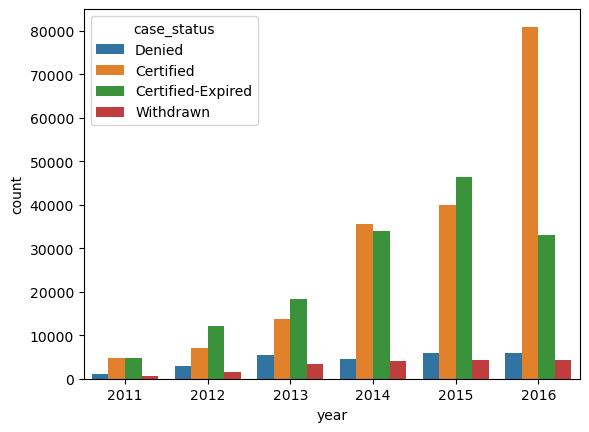

In [16]:
# year wise status

sns.countplot(x = 'year', hue = "case_status", data=df)

In [ ]:
# insights:
# upword trend
# 2016-highest

In [17]:
df.employer_city.unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'austin',
       'Carson City', 'Northfield'], dtype=object)

In [18]:
df.employer_city.value_counts()

employer_city
NEW YORK           16730
COLLEGE STATION    12118
SANTA CLARA        11113
SAN JOSE            9349
REDMOND             8804
                   ...  
Gaffney                1
CHERAW                 1
COLLINGDALE            1
decatur                1
Northfield             1
Name: count, Length: 8384, dtype: int64

In [19]:
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'PERRYSVILLE',
       'STILWELL', 'ROYAL OAKS'], dtype=object)

<Axes: xlabel='employer_city', ylabel='count'>

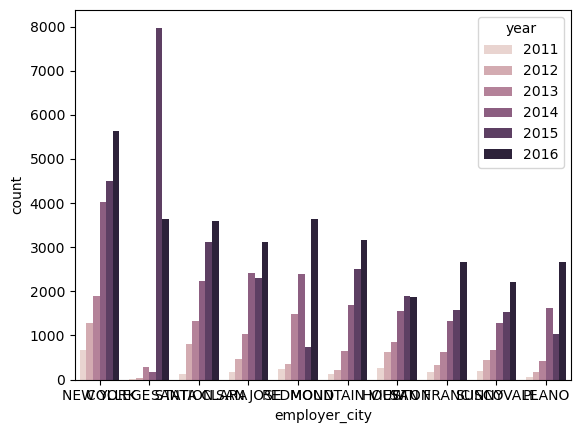

In [20]:
# employer year wise: year wise which are the city where visa approved people are woeking
x = sns.countplot(x = "employer_city", hue = "year", data=df, order = df.employer_city.value_counts().iloc[:10].index)

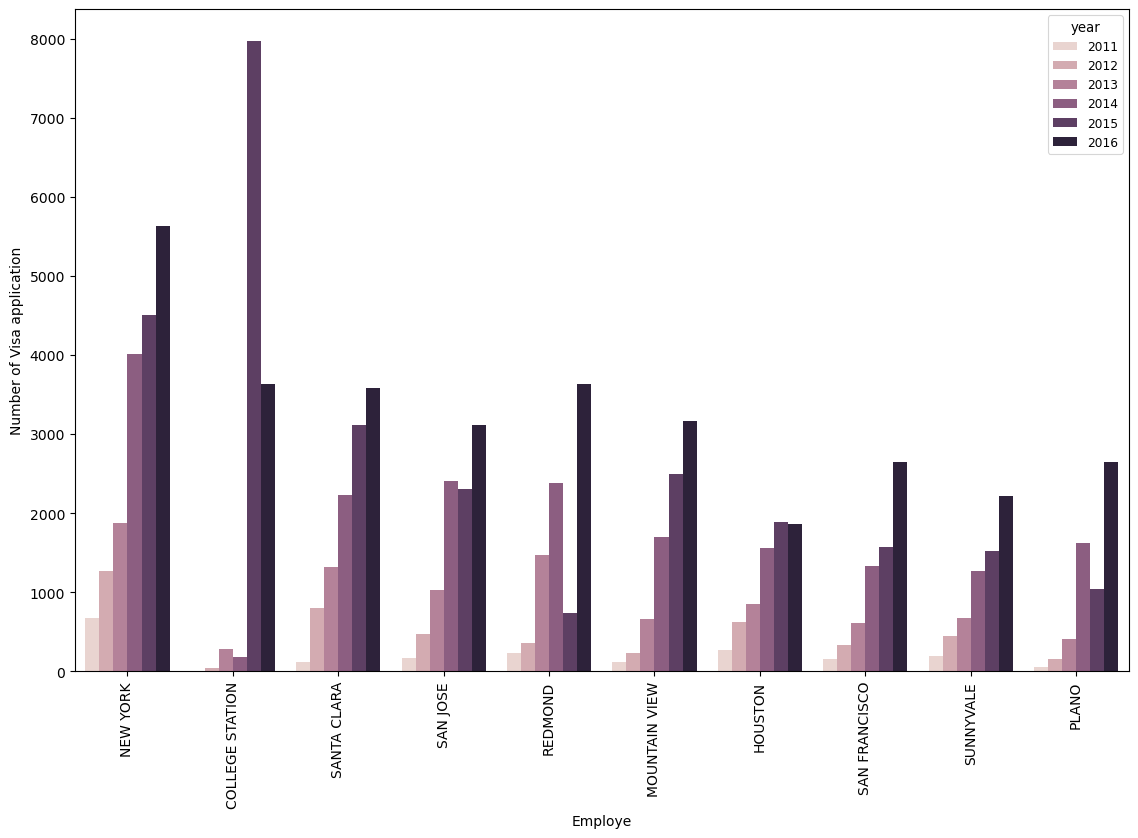

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(13.6, 8.6)

sns.set_context("paper", rc={"font.size":12,"axes.labelsize":12})
sns.countplot(x = "employer_city", hue = "year", data=df, order = df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
ax.set(xlabel="Employe", ylabel="Number of Visa application")
plt.show()

In [ ]:
# insights

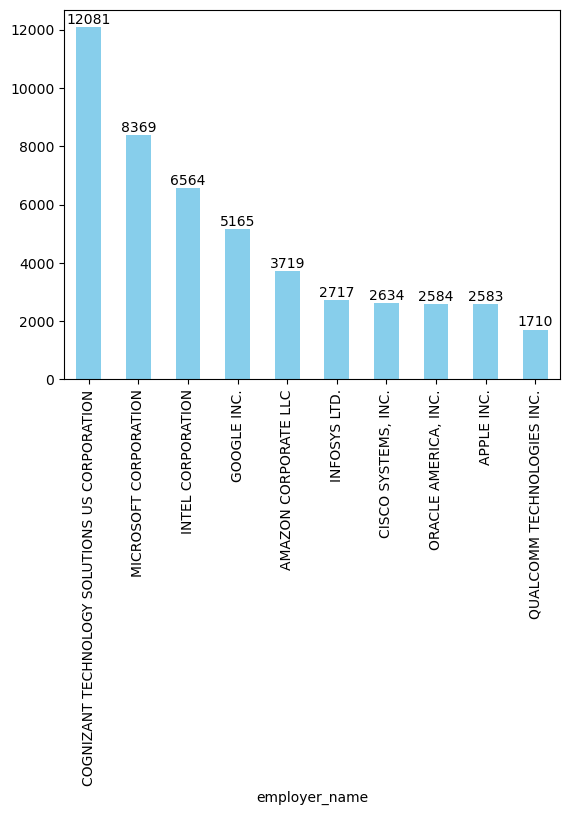

In [6]:
# top 10 employer by visa application
top_emp = df['employer_name'].value_counts().head(10)
top_emp.plot(kind = "bar", color = "skyblue")

for i, v in enumerate(top_emp):
    plt.text(i, v+10, str(v), ha = 'center', va = "bottom", fontsize = 10 )


In [8]:
df['us_economic_sector']

0                            IT
1         Other Economic Sector
2                     Aerospace
3         Other Economic Sector
4                  Advanced Mfg
                  ...          
374357                      NaN
374358                      NaN
374359                      NaN
374360                      NaN
374361                      NaN
Name: us_economic_sector, Length: 374362, dtype: object

In [9]:
us_economic_counts = {}
for value in df['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] =1

In [11]:
us_economic_counts

{'IT': 52617,
 'Other Economic Sector': 15798,
 'Aerospace': 4166,
 'Advanced Mfg': 18749,
 'Educational Services': 9130,
 'Retail': 4408,
 'Construction': 1409,
 'Hospitality': 1926,
 'Automotive': 1163,
 'Health Care': 6825,
 'Agribusiness': 939,
 'Finance': 9224,
 'Energy': 1086,
 'Transportation': 949,
 'Homeland Security': 82,
 'Biotechnology': 456,
 'Geospatial': 141}

In [13]:
# no as key and names of sector as list
usecollabels = []
usecolvalues = []

for key, value in us_economic_counts.items():
    usecollabels.append(key)
    usecolvalues.append(value)

In [14]:
usecollabels

['IT',
 'Other Economic Sector',
 'Aerospace',
 'Advanced Mfg',
 'Educational Services',
 'Retail',
 'Construction',
 'Hospitality',
 'Automotive',
 'Health Care',
 'Agribusiness',
 'Finance',
 'Energy',
 'Transportation',
 'Homeland Security',
 'Biotechnology',
 'Geospatial']

In [15]:
usecolvalues

[52617,
 15798,
 4166,
 18749,
 9130,
 4408,
 1409,
 1926,
 1163,
 6825,
 939,
 9224,
 1086,
 949,
 82,
 456,
 141]

<function matplotlib.pyplot.show(close=None, block=None)>

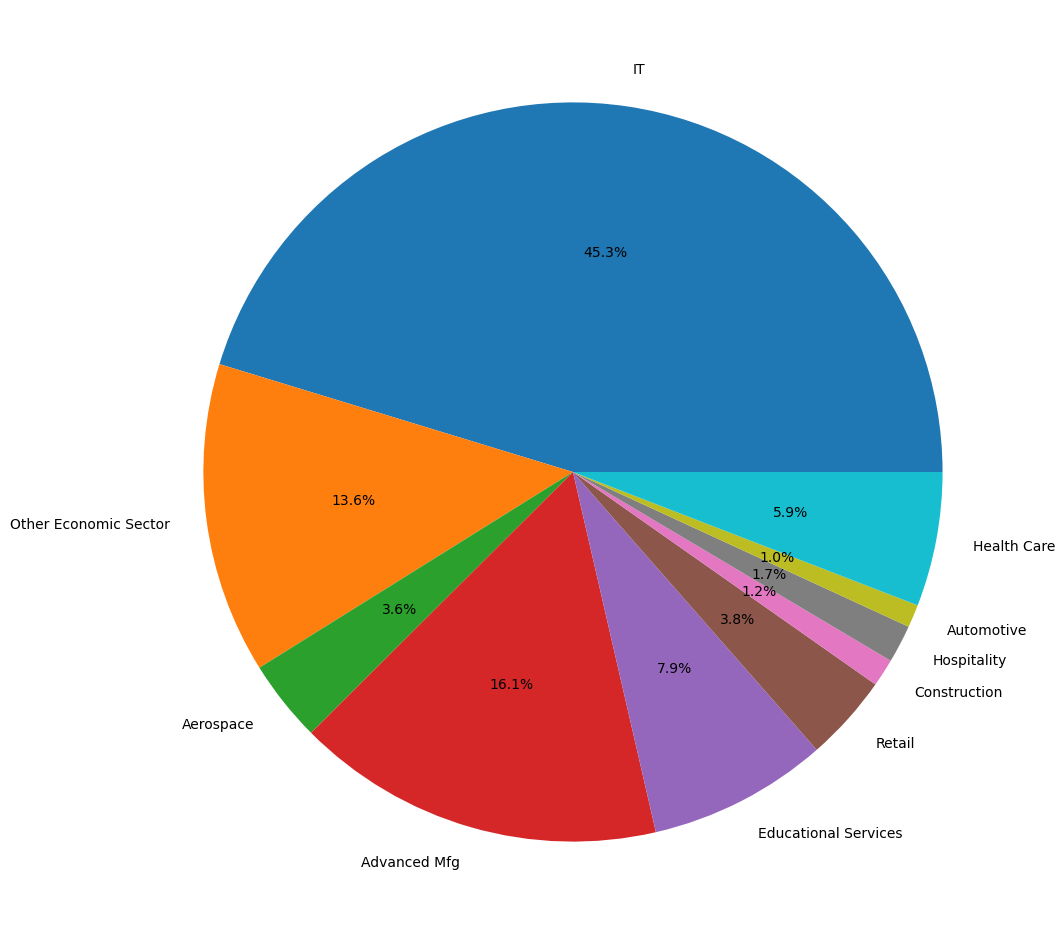

In [18]:
# pie chart 
plt.figure(figsize = (12, 12))
plt.pie(usecolvalues[:10], labels = usecollabels[:10], autopct = "%1.1f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

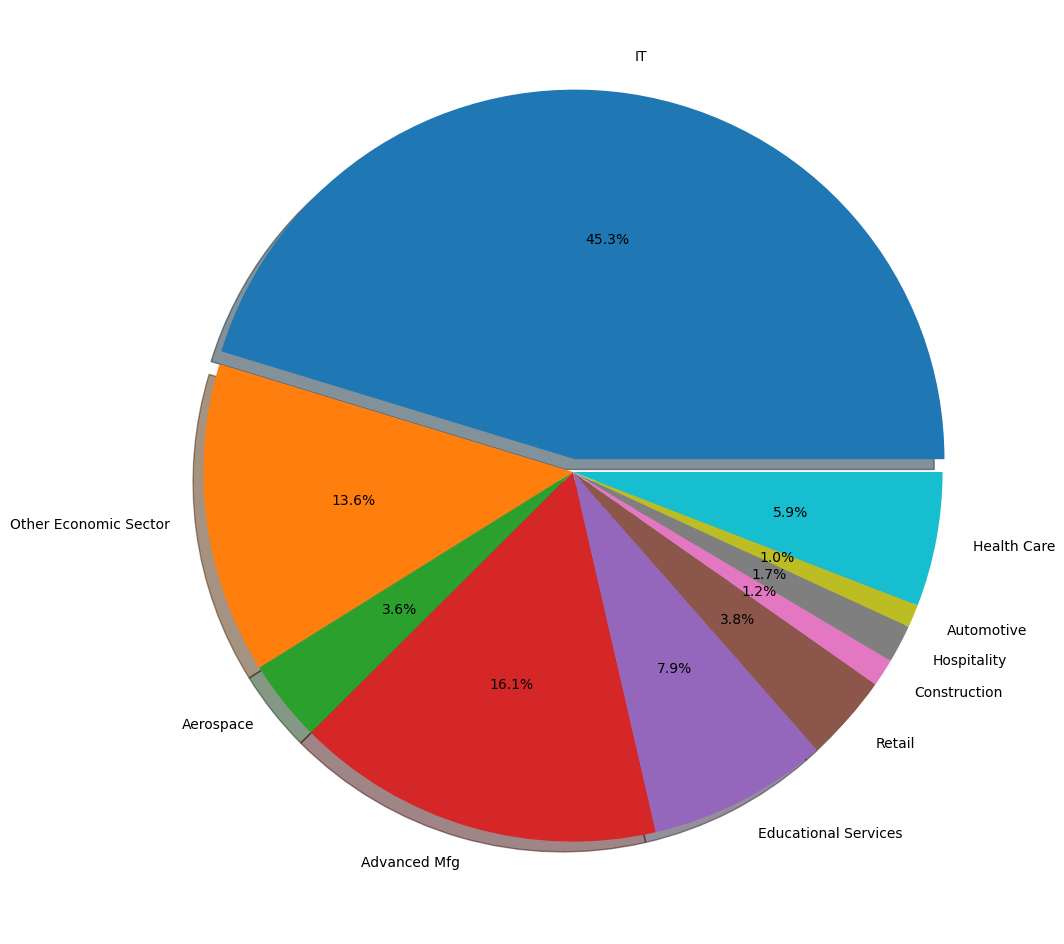

In [19]:
# pie chart with shadow
plt.figure(figsize = (12, 12))
explode = (0.035, 0, 0,0, 0, 0, 0, 0, 0, 0)
plt.pie(usecolvalues[:10], labels = usecollabels[:10], explode = explode, shadow = True, autopct = "%1.1f%%")
plt.show

In [ ]:
# insights >> IT


In [20]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [21]:
df['job_info_job_title']

0                               NaN
1                               NaN
2                               NaN
3                               NaN
4                               NaN
                    ...            
374357             Office Assistant
374358         Software Engineer II
374359     Computer Systems Analyst
374360             Accounting Clerk
374361    Component Design Engineer
Name: job_info_job_title, Length: 374362, dtype: object

In [23]:
# top 20 jobs
df['job_info_job_title'].value_counts()[:20]


job_info_job_title
Software Engineer                   14827
Computer Systems Analyst - V         4755
Senior Software Engineer             3925
Computer Systems Analyst - II        3434
Software Developer                   3013
Assistant Professor                  2674
Programmer Analyst                   2640
Computer Systems Analyst - IV        2501
Systems Analyst                      2093
Poultry Processing Worker            1987
Software Development Engineer II     1656
Poultry Processor                    1179
Component Design Engineer            1129
software engineer                    1009
Business Analyst                     1006
SOFTWARE ENGINEER                     903
Senior Programmer Analyst             877
Sr. Software Engineer                 874
Commercial Cleaner                    862
Senior Software Developer             839
Name: count, dtype: int64

In [ ]:
# Computer Systems Analyst -V. computer System Analyst - IV and so on, have different job title
# but job profile/domain is same

# software engineer, SOFTWARE ENGINEER, Sr Software engineer >> all this should come in same profile


In [28]:
df.job_info_job_title = df.job_info_job_title.str.lower()

# Splitting job title by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
# Splitting job title by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('II').str[0]
# Splitting job title by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]

# Removing leading and ending space
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
# Removing "Sr" valume with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr', 'senior')
# Replacing "Nan", "Not" and "nan", values with np.nan
df['job_info_job_title'].replace(["Nan", "NoT", "nan"], np.nan, inplace = True)

df['job_info_job_title'].value_counts(dropna=True)[:10]

job_info_job_title
software engineer                19211
computer systems analyst         12138
senior software engineer          4914
software developer                4721
programmer analyst                3918
assistant professor               2952
software development engineer     2814
systems analyst                   2670
poultry processing worker         1989
business analyst                  1593
Name: count, dtype: int64

In [31]:
# get the top 10 just title by count
Top_job_titles = df.job_info_job_title.value_counts().head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

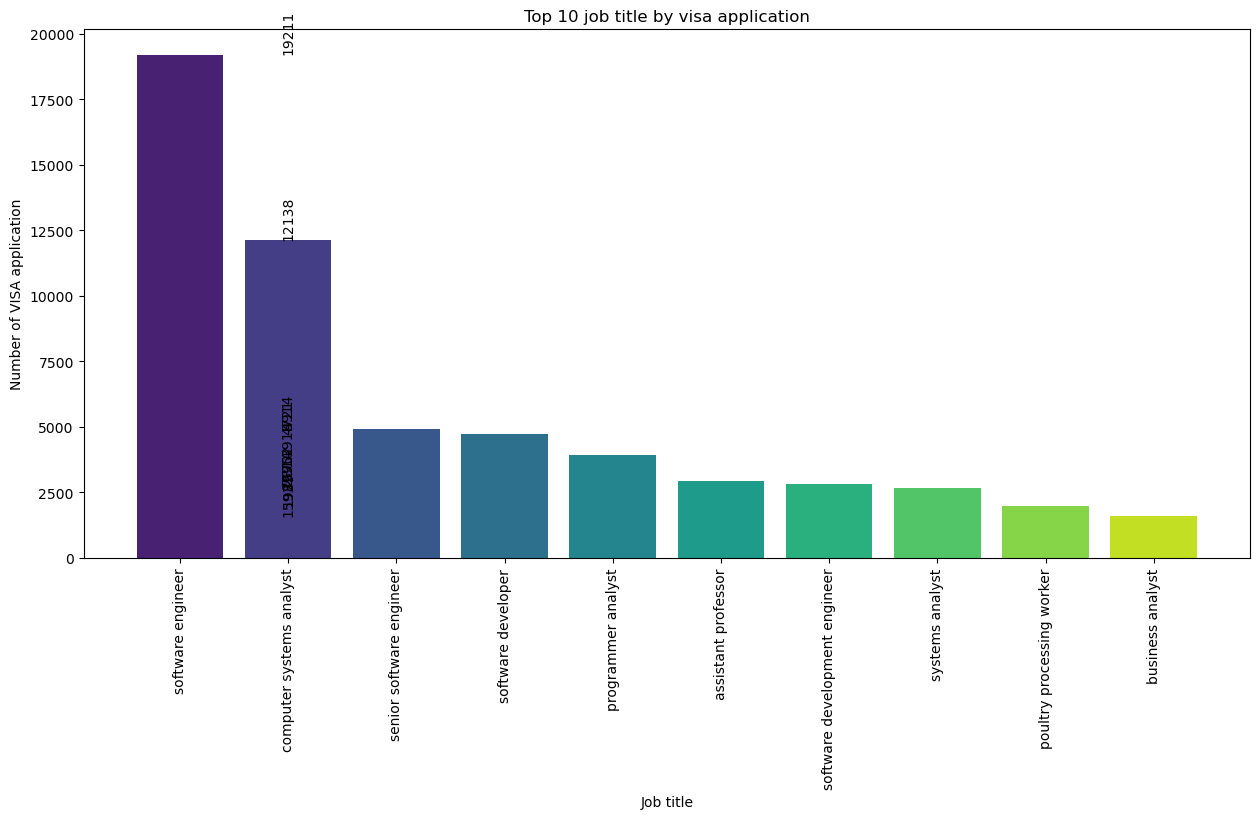

In [37]:
# create a bar plot
plt.figure(figsize = (12.7, 8.3))
plt.bar(Top_job_titles.index, Top_job_titles, color=sns.color_palette("viridis", len(Top_job_titles)))

# how to above add counts labels the bar chart
for i, v in enumerate(Top_job_titles):
    plt.text(1, v + 10, str(v), ha="center", va = "bottom", fontsize=10, rotation=90)

plt.xlabel("Job title")
plt.ylabel("Number of VISA application")
plt.title("Top 10 job title by visa application")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show

In [39]:
pd.Categorical(df.country_of_citizenship)

[NaN, NaN, NaN, NaN, NaN, ..., 'SOUTH KOREA', 'VIETNAM', 'INDIA', 'SOUTH KOREA', 'CHINA']
Length: 374362
Categories (202, object): ['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', ..., 'YEMEN', 'YUGOSLAVIA', 'ZAMBIA', 'ZIMBABWE']

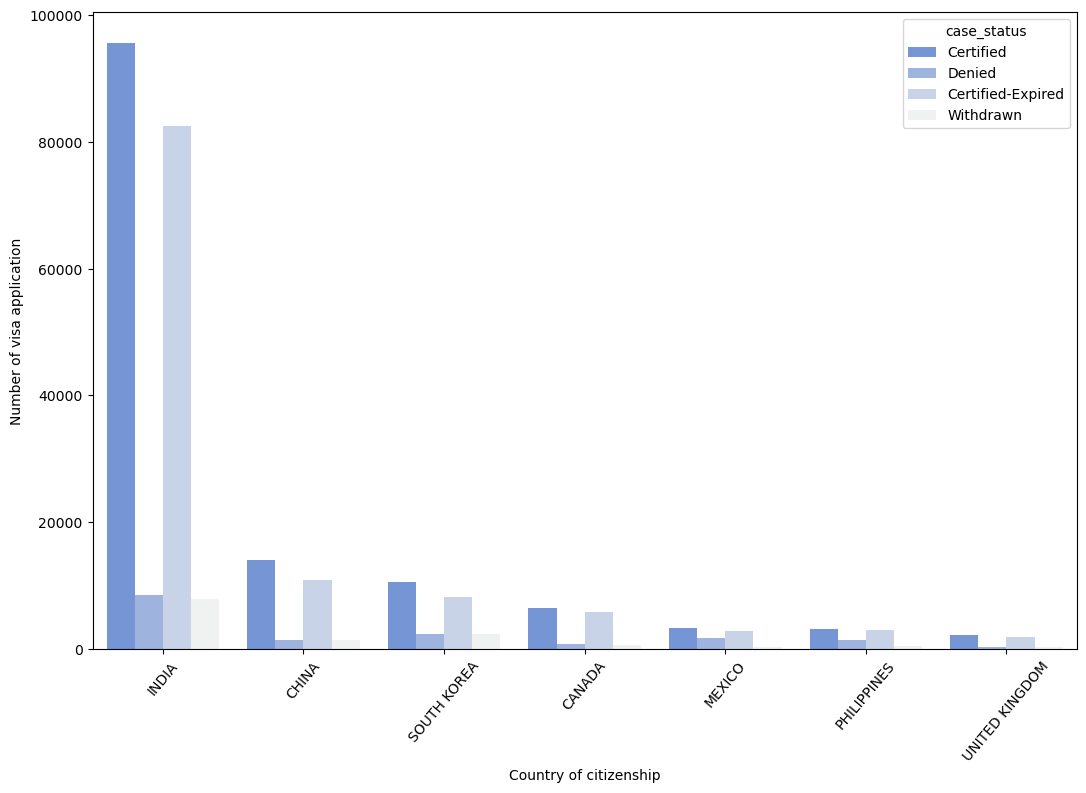

In [48]:
# convert country_of_citizenship column to categorical data type
df.country_of_citizenship = pd.Categorical(df.country_of_citizenship)

fig, ax = plt.subplots(figsize = (12.7, 8.27))

# creating the count plot
sns.countplot(x = 'country_of_citizenship', hue = 'case_status', data=df,
             palette=sns.diverging_palette(255, 133, l=60, n=7, center='light'),
             order=df.country_of_citizenship.value_counts().iloc[:7].index)

plt.xticks(rotation=50)

# setting labes items
ax.set(xlabel="Country of citizenship", ylabel="Number of visa application")

plt.show() # this line is neccesary to display the plot

In [49]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [50]:
df.case_status

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

In [54]:
df.loc[df['case_status'] == 'Certified', 'case_status'] =1
df.loc[df['case_status'] == 'Denied', 'case_status'] =0

In [55]:
df['case_status'].unique()

array([1, 0, 'Certified-Expired', 'Withdrawn'], dtype=object)

In [57]:
df['employer_state'].isna().sum()

42

In [59]:
df['employer_state'] = df['employer_state'].fillna(df['employer_state'].mode()[0])

In [60]:
df['employer_state'].isnull().sum()

0

In [61]:
df['employer_state']

0         NY
1         NY
2         VA
3         NY
4         NY
          ..
374357    CA
374358    WA
374359    MI
374360    AZ
374361    CA
Name: employer_state, Length: 374362, dtype: object